In [1]:
%matplotlib inline


# Gromov-Wasserstein example


This example is designed to show how to use the Gromov-Wassertsein distance
computation in POT.



In [2]:
# Author: Erwan Vautier <erwan.vautier@gmail.com>
#         Nicolas Courty <ncourty@irisa.fr>
#
# License: MIT License

import scipy as sp
import numpy as np
import matplotlib.pylab as pl
from mpl_toolkits.mplot3d import Axes3D  # noqa
import ot

Sample two Gaussian distributions (2D and 3D)
 ---------------------------------------------

 The Gromov-Wasserstein distance allows to compute distances with samples that
 do not belong to the same metric space. For demonstration purpose, we sample
 two Gaussian distributions in 2- and 3-dimensional spaces.



In [3]:
n_samples = 30  # nb samples

mu_s = np.array([0, 0])
cov_s = np.array([[1, 0], [0, 1]])

mu_t = np.array([4, 4, 4])
cov_t = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])


xs = ot.datasets.get_2D_samples_gauss(n_samples, mu_s, cov_s)
P = sp.linalg.sqrtm(cov_t)
xt = np.random.randn(n_samples, 3).dot(P) + mu_t

Plotting the distributions
--------------------------



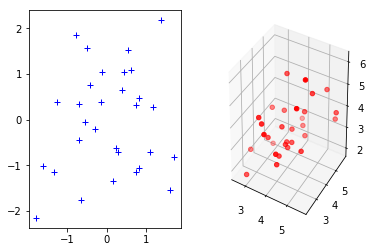

In [4]:
fig = pl.figure()
ax1 = fig.add_subplot(121)
ax1.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(xt[:, 0], xt[:, 1], xt[:, 2], color='r')
pl.show()

Compute distance kernels, normalize them and then display
---------------------------------------------------------



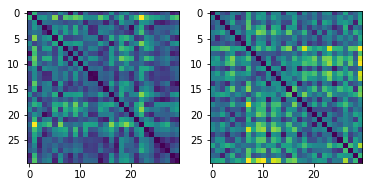

In [5]:
C1 = sp.spatial.distance.cdist(xs, xs)
C2 = sp.spatial.distance.cdist(xt, xt)

C1 /= C1.max()
C2 /= C2.max()

pl.figure()
pl.subplot(121)
pl.imshow(C1)
pl.subplot(122)
pl.imshow(C2)
pl.show()

Compute Gromov-Wasserstein plans and distance
---------------------------------------------



Gromov-Wasserstein distances between the distribution: 0.201997813845


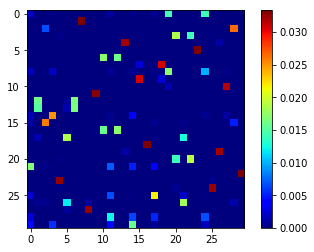

In [6]:
p = ot.unif(n_samples)
q = ot.unif(n_samples)

gw = ot.gromov_wasserstein(C1, C2, p, q, 'square_loss', epsilon=5e-4)
gw_dist = ot.gromov_wasserstein2(C1, C2, p, q, 'square_loss', epsilon=5e-4)

print('Gromov-Wasserstein distances between the distribution: ' + str(gw_dist))

pl.figure()
pl.imshow(gw, cmap='jet')
pl.colorbar()
pl.show()